In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [94]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [95]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
X = dataset[
    ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
].copy()


In [97]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [98]:
Y = dataset["Survived"]

In [99]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [100]:
 
Y = dataset["Survived"]        
 
 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [101]:
Y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [102]:
X_train  

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,female,NaN,0,2,15.2458,C
439,2,male,31.0,0,0,10.5000,S
817,2,male,31.0,1,1,37.0042,C
378,3,male,20.0,0,0,4.0125,C
491,3,male,21.0,0,0,7.2500,S
...,...,...,...,...,...,...,...
835,1,female,39.0,1,1,83.1583,C
192,3,female,19.0,1,0,7.8542,S
629,3,male,NaN,0,0,7.7333,Q
559,3,female,36.0,1,0,17.4000,S


In [103]:
X_test 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,male,NaN,0,0,14.4583,C
648,3,male,NaN,0,0,7.5500,S
278,3,male,7.0,4,1,29.1250,Q
31,1,female,NaN,1,0,146.5208,C
255,3,female,29.0,0,2,15.2458,C
...,...,...,...,...,...,...,...
780,3,female,13.0,0,0,7.2292,C
837,3,male,NaN,0,0,8.0500,S
215,1,female,31.0,1,0,113.2750,C
833,3,male,23.0,0,0,7.8542,S


In [104]:
Y_train 

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [105]:
imp = SimpleImputer(strategy="mean")

X_train[["Age"]] = imp.fit_transform(X_train[["Age"]])
X_test[["Age"]]  = imp.transform(X_test[["Age"]])


In [106]:
le_sex = LabelEncoder()
X_train["Sex"] = le_sex.fit_transform(X_train["Sex"])
X_test["Sex"]  = le_sex.transform(X_test["Sex"])

le_emb = LabelEncoder()
X_train["Embarked"] = le_emb.fit_transform(X_train["Embarked"])
X_test["Embarked"]  = le_emb.transform(X_test["Embarked"])


In [107]:
print("After Imputation & Encoding")
print(X_train)
print("\n----X_test----")
print(X_test)


After Imputation & Encoding
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
140       3    0  29.745184      0      2  15.2458         0
439       2    1  31.000000      0      0  10.5000         2
817       2    1  31.000000      1      1  37.0042         0
378       3    1  20.000000      0      0   4.0125         0
491       3    1  21.000000      0      0   7.2500         2
..      ...  ...        ...    ...    ...      ...       ...
835       1    0  39.000000      1      1  83.1583         0
192       3    0  19.000000      1      0   7.8542         2
629       3    1  29.745184      0      0   7.7333         1
559       3    0  36.000000      1      0  17.4000         2
684       2    1  60.000000      1      1  39.0000         2

[712 rows x 7 columns]

----X_test----
     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
495       3    1  29.745184      0      0   14.4583         0
648       3    1  29.745184      0      0    7.5500         2
278       3   

In [108]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test  = sc_x.transform(X_test)


In [109]:
X_test

array([[ 0.81925059,  0.72882288,  0.        , ..., -0.47741019,
        -0.34739758, -1.97652773],
       [ 0.81925059,  0.72882288,  0.        , ..., -0.47741019,
        -0.48528755,  0.57290659],
       [ 0.81925059,  0.72882288, -1.73889351, ...,  0.74092692,
        -0.0546496 , -0.70181057],
       ...,
       [-1.58118735, -1.37207547,  0.09593203, ..., -0.47741019,
         1.62498811, -1.97652773],
       [ 0.81925059,  0.72882288, -0.51567648, ..., -0.47741019,
        -0.4792157 ,  0.57290659],
       [ 0.81925059,  0.72882288, -0.82148074, ..., -0.47741019,
        -0.47530753,  0.57290659]], shape=(179, 7))

In [110]:
X_train

array([[ 0.81925059, -1.37207547,  0.        , ...,  1.95926403,
        -0.33167904, -1.97652773],
       [-0.38096838,  0.72882288,  0.09593203, ..., -0.47741019,
        -0.42640542,  0.57290659],
       [-0.38096838,  0.72882288,  0.09593203, ...,  0.74092692,
         0.10261958, -1.97652773],
       ...,
       [ 0.81925059,  0.72882288,  0.        , ..., -0.47741019,
        -0.48162887, -0.70181057],
       [ 0.81925059, -1.37207547,  0.47818735, ..., -0.47741019,
        -0.28868112,  0.57290659],
       [-0.38096838,  0.72882288,  2.31301288, ...,  0.74092692,
         0.14245584,  0.57290659]], shape=(712, 7))

In [111]:
X_train.shape

(712, 7)

In [112]:
Y_train.shape

(712,)

In [113]:
X_train.dtype


dtype('float64')

In [114]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [115]:
Y_predict = reg.predict(X_test)

In [116]:
reg.coef_

array([[-0.84412328, -1.27802463, -0.55082558, -0.42508685, -0.05547462,
         0.08200534, -0.13154094]])

In [117]:
reg.intercept_

array([-0.64381987])

In [118]:
mse = mean_squared_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

In [119]:
print("Model Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)


Model Coefficients: [[-0.84412328 -1.27802463 -0.55082558 -0.42508685 -0.05547462  0.08200534
  -0.13154094]]
Intercept: [-0.64381987]


In [120]:
print(reg.predict([[60, 7.25, 3, 0, 1, 1, 0]]))


[0]


In [121]:
reg.predict([[30, 1250000, 1, 1, 1, 1, 1]])


array([0])

In [122]:
Classifier = DecisionTreeClassifier(criterion='gini')
#Classifier = DecisionTreeClassifier(criterion='entropy')

In [123]:
Classifier.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [124]:
Classifier.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [125]:
Classifier.score(X_test, Y_test)

0.7821229050279329

[Text(0.35985364412006576, 0.9761904761904762, 'x[1] <= -0.322\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.19274259868421054, 0.9285714285714286, 'x[0] <= 0.219\ngini = 0.38\nsamples = 247\nvalue = [63.0, 184.0]'),
 Text(0.27629812140213816, 0.9523809523809523, 'True  '),
 Text(0.09539473684210527, 0.8809523809523809, 'x[2] <= -2.083\ngini = 0.114\nsamples = 132\nvalue = [8, 124]'),
 Text(0.08881578947368421, 0.8333333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10197368421052631, 0.8333333333333334, 'x[5] <= -0.06\ngini = 0.101\nsamples = 131\nvalue = [7, 124]'),
 Text(0.08881578947368421, 0.7857142857142857, 'x[5] <= -0.072\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(0.08223684210526316, 0.7380952380952381, 'x[2] <= 2.007\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(0.06907894736842106, 0.6904761904761905, 'x[4] <= 0.132\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(0.0625, 0.6428571428571429, 'x[3] <= -0.026\ngini = 0.202\

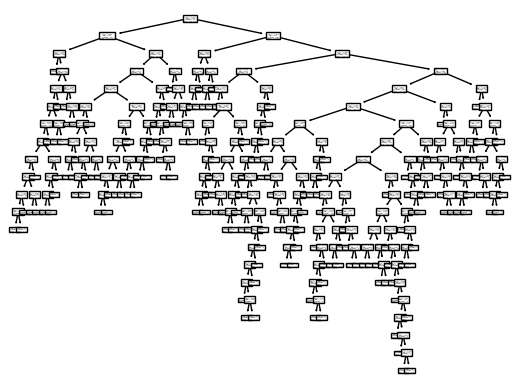

In [126]:
tree.plot_tree(Classifier)

In [127]:
Rclf = RandomForestClassifier(n_estimators=100 , criterion='gini')

In [128]:
Rclf.fit(X_train, Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [129]:
Rclf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [130]:
Rclf.score(X_test, Y_test)

0.8212290502793296

In [131]:
#Least Important Features method

#feature_names = ['Age','Fare','Pclass','SibSp','Parch','Sex','Embarked']

#pd.Series(Rclf.feature_importances_, index=feature_names)\ .sort_values(ascending=False)


In [132]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",9
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [133]:
Y_predict_knn = knn.predict(X_test)

In [134]:
knn.score(X_test, Y_test)

0.8212290502793296

In [135]:
Y_predict_knn = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_knn)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[100  10]
 [ 22  47]]


Text(0.5, 1.0, 'Confusion Matrix for KNN Classifier')

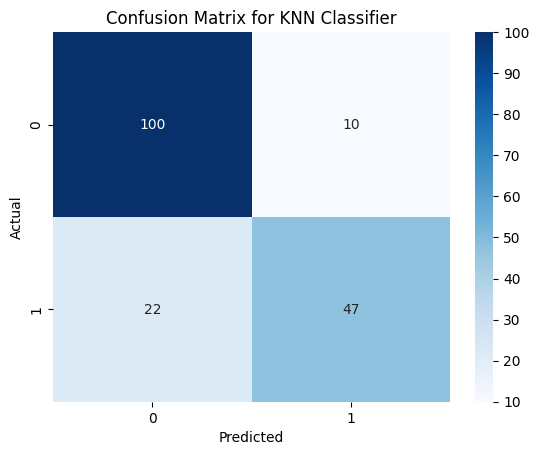

In [136]:
plt.Figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')

In [137]:
joblib.dump(Rclf, "random_forest_model.pkl")
joblib.dump(knn, "Knn_Model.pkl")

['Knn_Model.pkl']

In [138]:
joblib.dump(sc_x, "scaler.pkl")
joblib.dump(le_sex, "le_sex.pkl")
joblib.dump(le_emb, "le_emb.pkl")


['le_emb.pkl']

In [139]:
rf_model = joblib.load("random_forest_model.pkl")
sc_x = joblib.load("scaler.pkl")
le_sex = joblib.load("le_sex.pkl")
le_emb = joblib.load("le_emb.pkl")


In [140]:
new_data = pd.DataFrame({
    "Pclass": [3],
    "Sex": ["male"],
    "Age": [25],
    "SibSp": [0],
    "Parch": [0],
    "Fare": [7.25],
    "Embarked": ["S"]
})


In [141]:
new_data["Sex"] = le_sex.transform(new_data["Sex"])
new_data["Embarked"] = le_emb.transform(new_data["Embarked"])

new_data = sc_x.transform(new_data)


In [142]:
prediction = rf_model.predict(new_data)
print(prediction)


[0]


In [143]:
new_passenger = pd.DataFrame({
    "Pclass": [1],
    "Sex": ["female"],
    "Age": [25],
    "SibSp": [0],
    "Parch": [0],
    "Fare": [100],
    "Embarked": ["C"]
})


In [144]:
new_passenger["Sex"] = le_sex.transform(new_passenger["Sex"])
new_passenger["Embarked"] = le_emb.transform(new_passenger["Embarked"])


In [145]:
new_passenger = sc_x.transform(new_passenger)


In [146]:
prediction = rf_model.predict(new_passenger)
print(prediction)


[1]


In [147]:
Knn_Model = joblib.load("Knn_Model.pkl")
sc_x = joblib.load("scaler.pkl")
le_sex = joblib.load("le_sex.pkl")
le_emb = joblib.load("le_emb.pkl")


In [148]:
new_data = pd.DataFrame({
   
    "Pclass": [1],
    "Sex": ["female"],
    "Age": [25],
    "SibSp": [0],
    "Parch": [0],
    "Fare": [100],
    "Embarked": ["C"]
})

new_data["Sex"] = le_sex.transform(new_data["Sex"])
new_data["Embarked"] = le_emb.transform(new_data["Embarked"])

new_data = sc_x.transform(new_data)
prediction = Knn_Model.predict(new_data)
print(prediction)


[1]
